# Pfizer-BioNTech Tweets

# Table of Contents

1. [Introduction](#section1)
2. [Problem Statement](#section2)
3. [Importing Libraries](#section3)
4. [Loading dataset](#section4)
5. [Profiling](#section5)
6. [EDA](#section6)
7. [Conclusion](#section7)
8. [Model Building](#section8)
* 8.1 [Splitting data](#section81)<br>
* 8.2 [Training](#section82)<br>
* 8.3 [Prediction](#section83)

# Introduction

- In December 2019, first coronaVirus case was found in China's Wuhan. In February 2020, most countries start to get coronaVirus cases as people from china didn't stop travelling to other countries.<br>
* Hopefully, Covid19's death rate is low as compared to other viruses. But still, till date, **2,132,043** people have died of coronaVirus and **71,480,567** get recovered.<br>
- All scientistes started to make vaccine for this deadly virus. *U.S. in partnership with BioNTech* made *Pfizer_BioNTech* vaccine which is **95% effective after 2 doses**. <br>
> - It's obvious that people have views on every vaccine including Pfizer_BioNTech. Tweeter is social-media platform where people can share their views on any topic. <br>
> - This dataset include info. about some *tweets* on Pfizer_BioNTech from various countries.

<center><img src="" width="600" height="360" /></center>

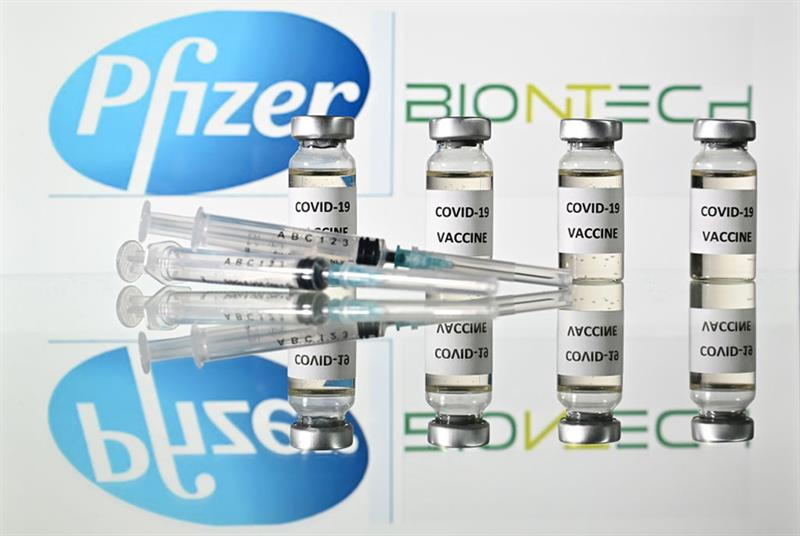

In [8]:
from IPython.display import Image
Image(filename=r"C:\Users\SWIKRUTI\Desktop\New folder\pfizer & biontech.jpg")

# Prblem Statement

- How many users having official account tweeted on Pfizer-BioNTech vaccine & non-official account users tweeted?
- Is there any tweet from various coutries like India?
- Do user having maximum followers has highest likes on his/her tweet? 

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

# Loading Pfizer Vaccine Tweets dataset

In [46]:
pfizer_dataset = pd.read_excel(r"C:\Users\SWIKRUTI\Desktop\New folder\ML_Project\vaccination_tweets.xlsx")
pfizer_dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971510016,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359249920,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140110080,eliðŸ‡±ðŸ‡¹ðŸ‡ªðŸ‡ºðŸ‘Œ,Your Bed,"heil, hydra ðŸ–â˜º",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918830080,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604960000,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


## Profiling 

In [18]:
pfizer_dataset.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [19]:
pfizer_dataset.shape

(3302, 16)

In [20]:
pfizer_dataset.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,3.302000e+03,3.302000e+03,3302.000000,3302.000000,3302.000000,3302.000000
mean,1.343403e+18,5.140656e+04,1157.452453,14275.658995,1.678074,11.202907
std,3.567138e+15,4.190450e+05,2348.682087,43491.982723,12.039026,74.163525
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.340025e+18,1.142500e+02,165.000000,377.250000,0.000000,0.000000
50%,1.343277e+18,5.085000e+02,459.500000,1770.000000,0.000000,1.000000
75%,1.346864e+18,2.384500e+03,1197.000000,10307.000000,1.000000,5.000000
max,1.349257e+18,1.371493e+07,64441.000000,924667.000000,446.000000,2129.000000


In [21]:
pfizer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                3302 non-null   int64         
 1   user_name         3302 non-null   object        
 2   user_location     2603 non-null   object        
 3   user_description  3095 non-null   object        
 4   user_created      3302 non-null   datetime64[ns]
 5   user_followers    3302 non-null   int64         
 6   user_friends      3302 non-null   int64         
 7   user_favourites   3302 non-null   int64         
 8   user_verified     3302 non-null   bool          
 9   date              3302 non-null   datetime64[ns]
 10  text              3302 non-null   object        
 11  hashtags          2442 non-null   object        
 12  source            3301 non-null   object        
 13  retweets          3302 non-null   int64         
 14  favorites         3302 n

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


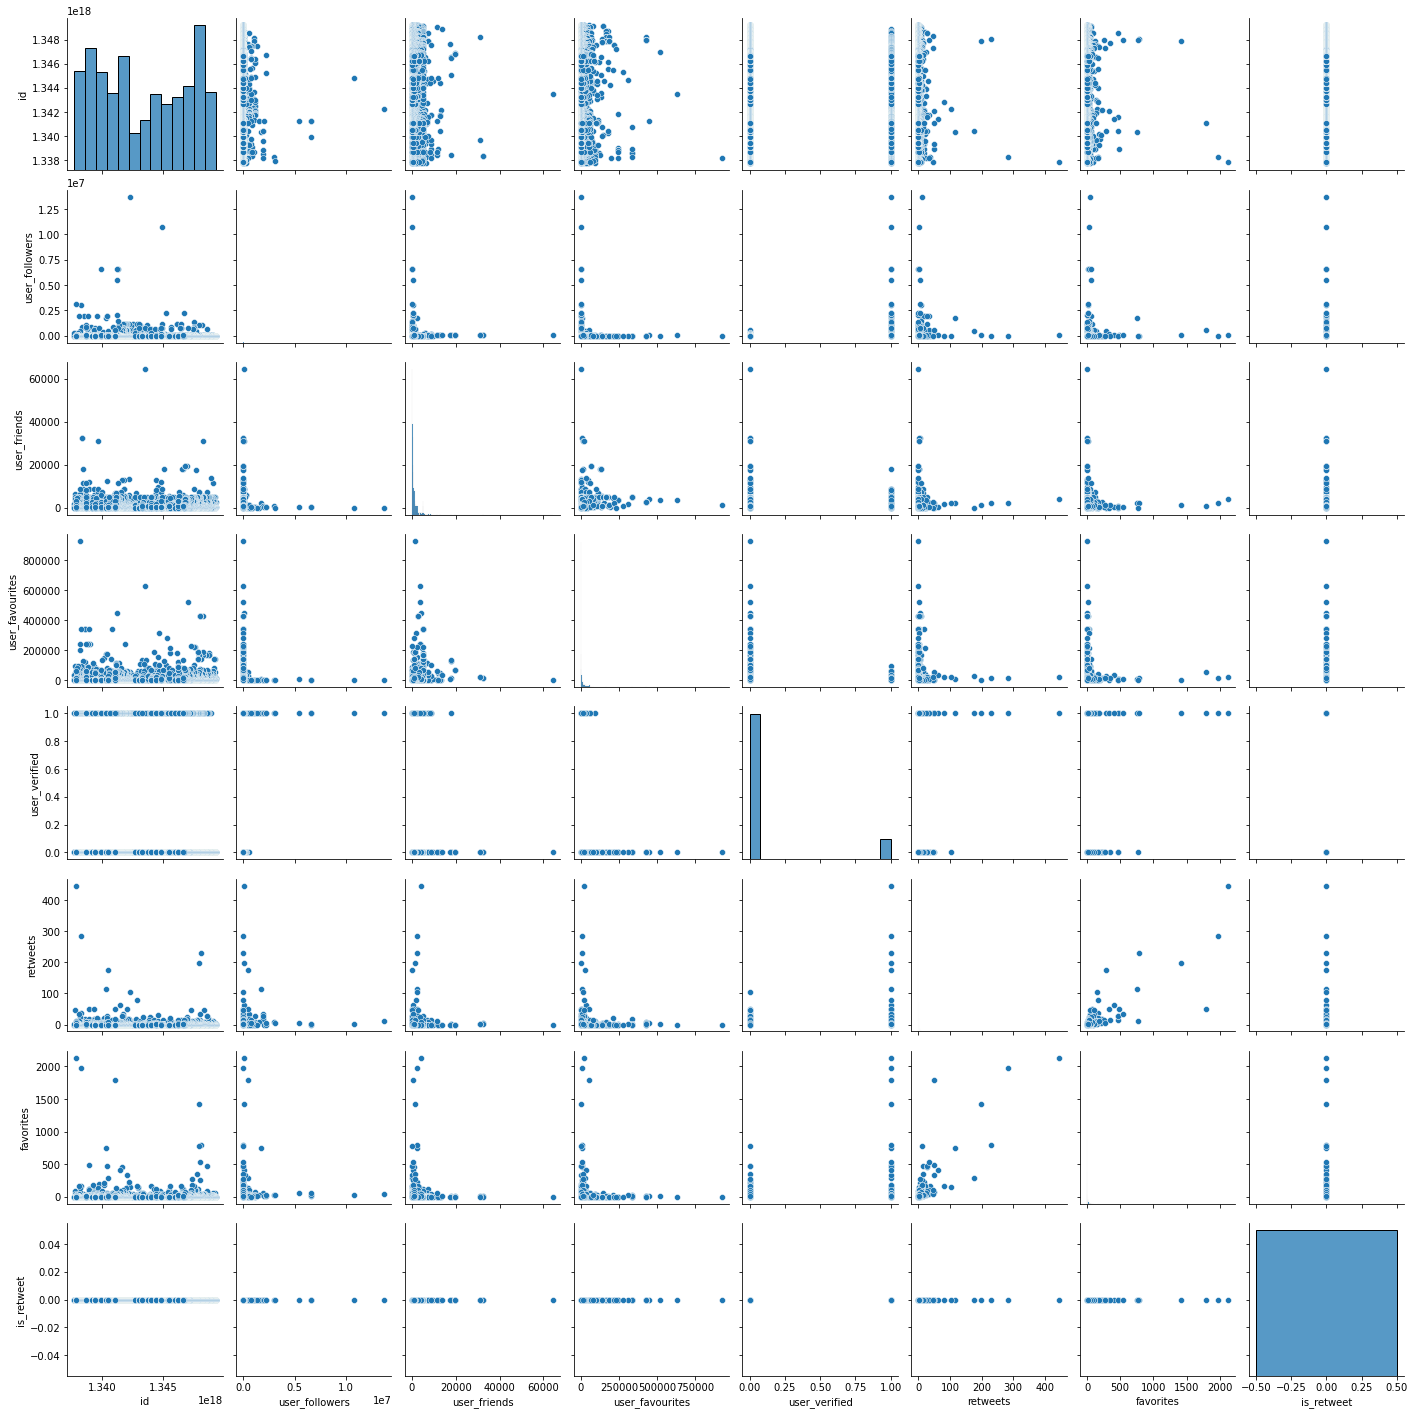

In [22]:
sns.pairplot(pfizer_dataset)

In [23]:
pfizer_dataset.isnull().sum() 

id                    0
user_name             0
user_location       699
user_description    207
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            860
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64

In [47]:
pfizer_dataset.drop(['user_name','user_created','hashtags','date','user_description','text','id','source'],axis=1,inplace=True)
pfizer_dataset.head()

,user_location,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,is_retweet
0,"La Crescenta-Montrose, CA",405,1692,3247,False,0,0,False
1,"San Francisco, CA",834,666,178,False,1,1,False
2,Your Bed,10,88,155,False,0,0,False
3,"Vancouver, BC - Canada",49165,3933,21853,True,446,2129,False
4,NaN,152,580,1473,False,0,0,False


## EDA

The user who has maximum followers

In [45]:
pfizer_dataset.loc[pfizer_dataset["user_followers"].argmax()]

user_location      Beijing, China
user_followers           13714928
user_friends                   69
user_favourites               159
user_verified                True
retweets                       12
favorites                      38
is_retweet                  False
Name: 1121, dtype: object

User who has maximum no. of likes oh his/her tweet

In [46]:
pfizer_dataset.loc[pfizer_dataset["favorites"].argmax()]

user_location      Vancouver, BC - Canada
user_followers                      49165
user_friends                         3933
user_favourites                     21853
user_verified                        True
retweets                              446
favorites                            2129
is_retweet                          False
Name: 3, dtype: object

In [47]:
pfizer_dataset.loc[pfizer_dataset["retweets"].argmax()]

user_location      Vancouver, BC - Canada
user_followers                      49165
user_friends                         3933
user_favourites                     21853
user_verified                        True
retweets                              446
favorites                            2129
is_retweet                          False
Name: 3, dtype: object

As we can see the same user has max likes & retweets on his/her tweet

In [48]:
pfizer_dataset.loc[pfizer_dataset["user_location"]=="Mumbai, India"].values

array([['Mumbai, India', 64185, 1183, 1794, True, 1, 5, False],
       ['Mumbai, India', 67096, 344, 118, True, 0, 2, False],
       ['Mumbai, India', 67096, 344, 118, True, 1, 1, False],
       ['Mumbai, India', 67096, 344, 118, True, 0, 0, False],
       ['Mumbai, India', 67096, 344, 118, True, 0, 0, False],
       ['Mumbai, India', 67096, 344, 118, True, 0, 1, False],
       ['Mumbai, India', 89, 74, 1496, False, 0, 1, False],
       ['Mumbai, India', 67089, 343, 119, True, 0, 1, False],
       ['Mumbai, India', 69, 326, 19, False, 0, 0, False],
       ['Mumbai, India', 67083, 343, 117, True, 1, 1, False],
       ['Mumbai, India', 76, 328, 19, False, 0, 0, False],
       ['Mumbai, India', 64176, 1184, 1794, True, 0, 7, False],
       ['Mumbai, India', 697, 154, 83, False, 0, 0, False],
       ['Mumbai, India', 67159, 344, 120, True, 0, 0, False],
       ['Mumbai, India', 3658, 64, 19, False, 0, 4, False],
       ['Mumbai, India', 4923, 3138, 1197, True, 0, 1, False],
       ['Mumbai

In [49]:
pfizer_dataset.loc[pfizer_dataset["user_location"]=="Ahmedabad"].values

array([['Ahmedabad', 316, 81, 6660, False, 0, 2, False]], dtype=object)

In [50]:
pfizer_dataset.loc[pfizer_dataset["user_location"]=="New Delhi"].values

array([['New Delhi', 59733, 45, 103, True, 2, 5, False],
       ['New Delhi', 59733, 45, 103, True, 2, 5, False],
       ['New Delhi', 59733, 45, 103, True, 0, 6, False],
       ['New Delhi', 59868, 45, 110, True, 0, 1, False],
       ['New Delhi', 59868, 45, 110, True, 0, 10, False],
       ['New Delhi', 59925, 45, 117, True, 0, 4, False],
       ['New Delhi', 60006, 45, 118, True, 0, 1, False],
       ['New Delhi', 60006, 45, 118, True, 2, 5, False],
       ['New Delhi', 60072, 45, 118, True, 1, 11, False]], dtype=object)

As we can see, many people from **India** tweeted on Pfizer-BioNTech vaccine.

In [51]:
pfizer_1 = pfizer_dataset["user_verified"].value_counts()
pfizer_1.index=['non-official account','official account']
pfizer_1

non-official account    2896
official account         406
Name: user_verified, dtype: int64

2896 users have unofficial account, while 406 have official account

Text(0.5, 1.0, 'favorites vs user_followers')

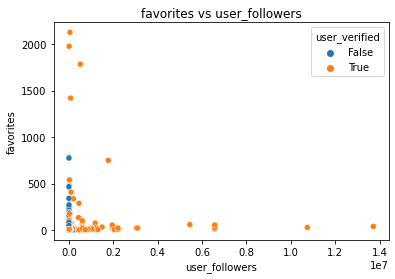

In [52]:
sns.scatterplot(x='user_followers',y='favorites',hue='user_verified',data=pfizer_dataset).set_title('favorites vs user_followers') 

From above plot, it is clear that there is no such thing that user having maximum followers get more likes on his/her tweet!! 
<br> & it also doesn't matter whether account is official or not

Text(0.5, 1.0, 'retweets vs user_followers')

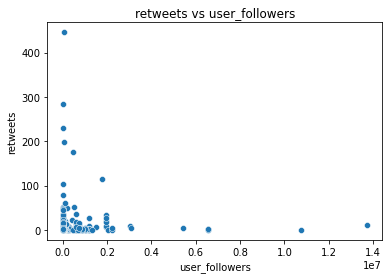

In [53]:
sns.scatterplot(x='user_followers',y='retweets',data=pfizer_dataset).set_title('retweets vs user_followers') 

Text(0.5, 1.0, 'Count plot for retweets')

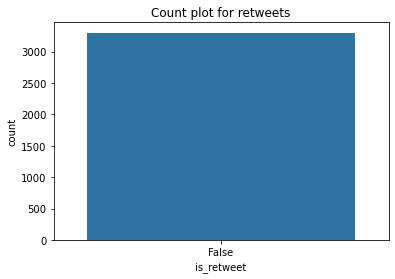

In [54]:
sns.countplot(x='is_retweet', data=pfizer_dataset).set_title('Count plot for retweets')  

No tweet on Pfizer-BioNTech vaccine gets retweeted.

# Conclusion

1. **406 official account** users & **2896 non-offifcial account** users tweeted on Pfizer-BioNTech vaccine.<br>
2. **No tweet** gets **retweeted**.<br>
3. Also, user having **maximum followers** does **not get highest likes** on his/her tweet.

#  Model Building

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
labelencoder_x = LabelEncoder()
pfizer_dataset["user_verified"] = labelencoder_x.fit_transform(pfizer_dataset["user_verified"])
pfizer_dataset["is_retweet"] = labelencoder_x.fit_transform(pfizer_dataset["is_retweet"])
pfizer_dataset.head()

,user_location,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,is_retweet
0,"La Crescenta-Montrose, CA",405,1692,3247,0,0,0,0
1,"San Francisco, CA",834,666,178,0,1,1,0
2,Your Bed,10,88,155,0,0,0,0
3,"Vancouver, BC - Canada",49165,3933,21853,1,446,2129,0
4,NaN,152,580,1473,0,0,0,0


In [50]:
pfizer_dataset.drop('user_location',axis=1,inplace=True)
pfizer_dataset.head()

,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,is_retweet
0,405,1692,3247,0,0,0,0
1,834,666,178,0,1,1,0
2,10,88,155,0,0,0,0
3,49165,3933,21853,1,446,2129,0
4,152,580,1473,0,0,0,0


In [51]:
X = pfizer_dataset.drop('user_verified',axis=1)
y = pfizer_dataset.user_verified

In [52]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

# Splitting the data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2476, 6)
(826, 6)
(2476,)
(826,)


# Training

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()

fit = model.fit(X_train, y_train)

In [58]:
y_predict = model.predict(X)

In [59]:
print(accuracy_score(y_predict, y))

0.9149000605693519


# Hyperparameter Tuning

In [60]:
param_grid = [
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#         'dual' : ['False', 'True'],
        'fit_intercept' : ['False', 'True'],
        'class_weight' : ['dict', 'balanced'],
        'solver' : ['Ibfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
        'max_iter' : [100, 5000, 2],
        'multi_class' : ['auto', 'ovr', 'multinomial'],
        'warm_start' : ['False', 'True']
    }
]

In [61]:
from sklearn.model_selection import GridSearchCV
clas = GridSearchCV(model, param_grid = param_grid, cv=5, n_jobs=-1)

In [62]:
clas1 = clas.fit(X_train, y_train)
clas1.best_estimator_

C:\Users\Default\Desktop\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(class_weight='balanced', fit_intercept='False',
                   multi_class='ovr', penalty='l1', solver='liblinear',
                   warm_start='True')

# Prediction

In [63]:
y_predict = model.predict(X)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [65]:
print(accuracy_score(y_predict, y))
print(confusion_matrix(y_predict, y))

0.9149000605693519
[[2884  269]
 [  12  137]]
